In [9]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers.experimental import preprocessing
import os
import cv2
import glob

In [10]:
CURRENT_PATH = os.getcwd()
CURRENT_PATH = "\\".join(CURRENT_PATH.split('\\')[:-2])
ORIGIN_PATH = "\\images\\origin\\"
MASK_PATH = "\\images\\masked\\"
SAVE_PATH = "\\images\\bg_remove\\"

In [11]:
def remove_background_to_alpha(image_path: str, mask_path: str, save_path: str) -> bytes:
    image = Image.open(image_path)
    mask = Image.open(mask_path)
    image = image.convert("RGBA")
    mask = mask.convert("L")
    image.putalpha(mask)
    image = image.resize((600,600))
    print(np.asarray(image).shape)
    res_name = image_path.split("\\")[-1].split(".")[0]
    image.save(save_path + f"{res_name}.png", format="PNG")

In [12]:
for pic_name in zip(glob.glob(CURRENT_PATH + ORIGIN_PATH + "*.jpg"), 
                 glob.glob(CURRENT_PATH + MASK_PATH + "*.jpg")):
    origin_path = pic_name[0]
    mask_path = pic_name[1]
    remove_background_to_alpha(origin_path, mask_path, CURRENT_PATH + SAVE_PATH)

(600, 600, 4)
(600, 600, 4)
(600, 600, 4)
(600, 600, 4)
(600, 600, 4)
(600, 600, 4)
(600, 600, 4)


In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).reshape(1,900,900,3)
seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY).reshape(1,900,900,1)

NameError: name 'img' is not defined

In [ ]:
seg_img.shape

(1, 900, 900, 1)

In [ ]:
img.shape

(1, 900, 900, 3)

In [ ]:
image = np.concatenate([img, seg_img], axis=3)

In [ ]:
image.shape

(1, 900, 900, 4)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=1,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=[0.9,3.5],
    fill_mode='nearest'
)
aug_iter = datagen.flow(image)

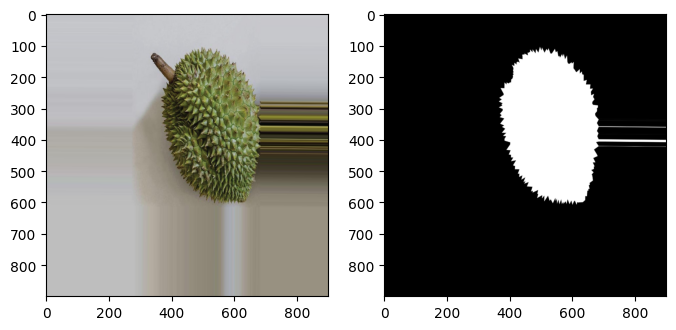

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax = ax.ravel()
# convert to unsigned integers
imgs = next(aug_iter)[0]
# plot image
ax[0].imshow(imgs[:,:,:3]/255)
ax[1].imshow(imgs[:,:,3], cmap='gray')
plt.show()

In [ ]:
def remove_background_to_alpha(image_path: str, mask_path: str) -> bytes:
    image = Image.open(image_path)
    mask = Image.open(mask_path)
    image = image.convert("RGBA")
    mask = mask.convert("L")
    image.putalpha(mask)
    image.save("result.png", format="PNG")

In [ ]:
remove_background_to_alpha("D:\\VS_Workspace\\Durian_camera\\images\\durian_images\\426\\1x\\426.jpg",
                           "D:\\VS_Workspace\\Durian_camera\\images\\durian_images\\426\\1x\\426_seg.jpg")